### Задача 5.2

In [123]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

%matplotlib inline

In [124]:
data = load_iris()

#разделим полученные данные по компонентам
components = [[], [], []]
for i in range(len(data['data'])):
    components[data['target'][i]].append(data['data'][i])
components = np.array(components)

Оцениваем параметры распределений компонент по предложенным формулам

In [125]:
means = []
for i in range(3):
    means.append(np.mean(components[i], axis=0))

covs = np.zeros((3, 4, 4))
for k in range(3):
    for i in range(4):
        for j in range(4):
            covs[k][i][j] = np.mean(components[k, :, i] * components[k, :, j]) \
                            - means[k][i] * means[k][j]
    
for i in range(3):
    print("Компонента " + str(i) + ":")
    print("Матожидание: ", means[i])
    print("Матрица ковариаций:\n", covs[i])
    #проверяем что это действительно матрицы ков.
    if np.linalg.det(covs[i]) > 0:
        print(True)
    print('\n')

Компонента 0:
Матожидание:  [ 5.006  3.418  1.464  0.244]
Матрица ковариаций:
 [[ 0.121764  0.098292  0.015816  0.010336]
 [ 0.098292  0.142276  0.011448  0.011208]
 [ 0.015816  0.011448  0.029504  0.005584]
 [ 0.010336  0.011208  0.005584  0.011264]]
True


Компонента 1:
Матожидание:  [ 5.936  2.77   4.26   1.326]
Матрица ковариаций:
 [[ 0.261104  0.08348   0.17924   0.054664]
 [ 0.08348   0.0965    0.081     0.04038 ]
 [ 0.17924   0.081     0.2164    0.07164 ]
 [ 0.054664  0.04038   0.07164   0.038324]]
True


Компонента 2:
Матожидание:  [ 6.588  2.974  5.552  2.026]
Матрица ковариаций:
 [[ 0.396256  0.091888  0.297224  0.048112]
 [ 0.091888  0.101924  0.069952  0.046676]
 [ 0.297224  0.069952  0.298496  0.047848]
 [ 0.048112  0.046676  0.047848  0.073924]]
True




Строим графики изолиний плотности и точек выборки для соответсвующих проекций компонент смеси на предложенные координаты. Предварительно оцениваем параметры.

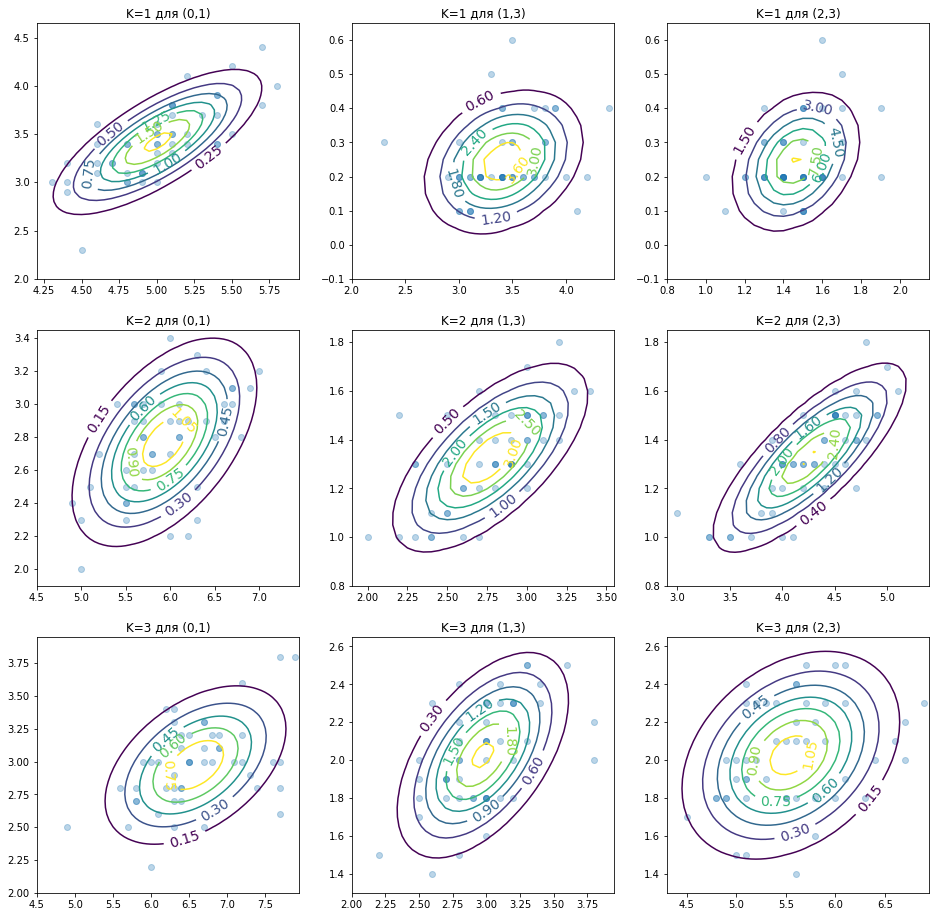

In [144]:
#границы сеток графиков
limits = ( (([4.2, 6], [2, 4.7]), ([2, 4.5], [-0.1, 0.7]), ([0.8, 2.2], [-0.1, 0.7])),
           (([4.5, 7.5], [1.9, 3.5]), ([1.9, 3.6], [0.8, 1.9]), ([2.9, 5.4], [0.8, 1.9])),
           (([4.5, 8], [2, 4]), ([2, 4], [1.3, 2.7]), ([4.3, 7], [1.3, 2.7])) )

coordinates = ((0, 1), (1, 3), (2, 3))

#была ошибка с contour
with np.errstate(invalid='ignore', divide='ignore'):
    #сетка для графиков
    ax = []
    fig, ax = plt.subplots(3, 3)
    fig.set_figheight(16)
    fig.set_figwidth(16)
    
    #для каждой компоненты
    for k in range(3):
        #для каждой пары координат
        for pair in coordinates:
            #берем параметры из уже имеющейся оценки
            mean = (means[k][pair[0]], means[k][pair[1]])
            cov = ( (covs[k][pair[0]][pair[0]], covs[k][pair[0]][pair[1]]),
                    (covs[k][pair[1]][pair[0]], covs[k][pair[1]][pair[1]]) )
            
            #сетка
            l = limits[k][pair[0]]
            grid = np.mgrid[l[0][0]:l[0][1]:0.05, l[1][0]:l[1][1]:0.05]
            
            #плотность получившегося распределения
            density = np.array([[sps.multivariate_normal.pdf((grid[0, i, j], 
                                 grid[1, i, j]), mean, cov)
                                        for j in range(grid[1].shape[1])]
                                    for i in range(grid[0].shape[0])])

            #ax[k][pair[0]].pcolormesh(grid[0], grid[1], density, cmap='Oranges')
            #точки выборки
            ax[k][pair[0]].scatter(components[k][:, pair[0]], 
                                   components[k][:, pair[1]], alpha=0.3)
            #линии уровня
            CS = ax[k][pair[0]].contour(grid[0], grid[1], density)
            ax[k][pair[0]].clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
            ax[k][pair[0]].set_title('K={} для ({},{})'.format(k + 1, pair[0], pair[1]))
    plt.show()

Оценим вероятность $P(T = k)$:

In [147]:
comp_probability = []
for i in range(3):
    comp_probability.append(len(components[i]) / len(data['data']))
    print ("Вероятность вхождения компоненты " + str(i) 
           + " равна " + str(comp_probability[i]))

Вероятность вхождения компоненты 0 равна 0.3333333333333333
Вероятность вхождения компоненты 1 равна 0.3333333333333333
Вероятность вхождения компоненты 2 равна 0.3333333333333333


Т.е. $P(T = k) = \frac{1}{3}$

Вычислим $E(X|T \neq k)$:

Обозначим математическое ожидание компонент смеси как $\alpha_1, \alpha_2, \alpha_3$.

Считаем для $k = 1$:

$E(X\,|\,I\{T \neq 1\}) = \frac{E(X \cdot I\{T = 1\})}{P(T = 1)} \cdot I\{T = 1\} + \frac{E(X \cdot I\{T \neq 1\} )}{P(T\neq 1)} \cdot I\{T \neq 1\} = 3 \cdot E(X \cdot I\{T = 1\})(1 - I\{T \neq 1\}) + \frac{3}{2} \left(\, E(X \cdot I\{T = 2\}) + E(X \cdot I\{T = 3\}) \, \right) \, I\{T \neq 1\} = \frac{1}{2} \left( \alpha_2 + \alpha_3 \right) I\{T \neq 1\}$

Отсюда получаем: 

$E( X | I\{T \not= 1\}) = \frac{1}{2} \left( \alpha_2 + \alpha_3 \right) $

Для остальных $k$ аналогично.

In [149]:
for i in range(3):
    print("E(X | T != {}) = ".format(i) + str((means[(i + 1) % 3] + means[(i + 2) % 3]) / 2))

E(X | T != 0) = [ 6.262  2.872  4.906  1.676]
E(X | T != 1) = [ 5.797  3.196  3.508  1.135]
E(X | T != 2) = [ 5.471  3.094  2.862  0.785]


Условная плотность: 

$p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right) = \frac{1}{2}(p_{X|I\{T = k\}}\left(x \left| 2\right.\right) + p_{X|I\{T = k\}}\left(x \left| 3\right.\right))$

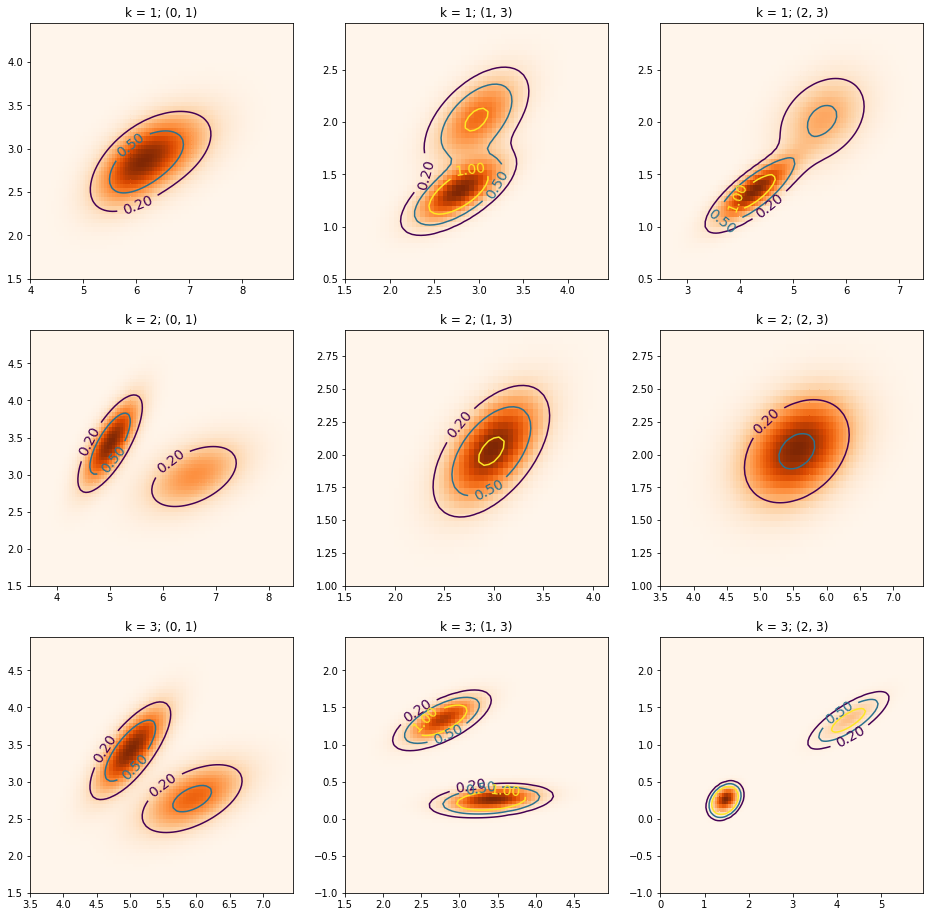

In [166]:
coordinates = ((0, 1), (1, 3), (2, 3))
limits = ( (([4, 9], [1.5, 4.5]), ([1.5, 4.5], [0.5, 3]), ([2.5, 7.5], [0.5, 3])),
           (([3.5, 8.5], [1.5, 5]), ([1.5, 4.2], [1, 3]), ([3.5, 7.5], [1, 3])),
           (([3.5, 7.5], [1.5, 5]), ([1.5, 5], [-1, 2.5]), ([0, 6], [-1, 2.5])) )

ax = []
fig, ax = plt.subplots(3, 3)
fig.set_figheight(16)
fig.set_figwidth(16)
    
for k in range(3):
    for (c1, c2) in coordinates:
        ind_1 = (k + 1) % 3
        mean_1 = (means[ind_1][c1], means[ind_1][c2])
        cov_1 = ( (covs[ind_1][c1][c1], covs[ind_1][c1][c2]),
                  (covs[ind_1][c2][c1], covs[ind_1][c2][c2]) )
        
        ind_2 = (k + 2) % 3
        mean_2 = (means[ind_2][c1], means[ind_2][c2])
        cov_2 = ( (covs[ind_2][c1][c1], covs[ind_2][c1][c2]),
                  (covs[ind_2][c2][c1], covs[ind_2][c2][c2]) )
        
        l = limits[k][c1]
        grid = np.mgrid[l[0][0]:l[0][1]:0.05, l[1][0]:l[1][1]:0.05]
        
        density_1 = np.array([[sps.multivariate_normal.pdf((grid[0, i, j], 
                                 grid[1, i, j]), mean_1, cov_1)
                                        for j in range(grid[1].shape[1])]
                                    for i in range(grid[0].shape[0])])
        
        density_2 = np.array([[sps.multivariate_normal.pdf((grid[0, i, j], 
                                 grid[1, i, j]), mean_2, cov_2)
                                        for j in range(grid[1].shape[1])]
                                    for i in range(grid[0].shape[0])])
        
        density = (density_1 + density_2) / 2

        ax[k][c1].pcolormesh(grid[0], grid[1], density, cmap='Oranges')
        CS = ax[k][c1].contour(grid[0], grid[1], density, [0.2, 0.5, 1])
        ax[k][c1].clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
        ax[k][c1].set_title("k = {}".format(k + 1) + "; " + str((c1, c2)))
plt.show()

Классифицируем пространство

In [198]:
density_1 = sps.multivariate_normal(mean=means[0], cov=covs[0]).pdf
density_2 = sps.multivariate_normal(mean=means[1], cov=covs[1]).pdf
density_3 = sps.multivariate_normal(mean=means[2], cov=covs[2]).pdf

classifications = [np.argmax([density_1(x), density_2(x), density_3(x)]) 
                       for x in data['data']]

error = classifications - data['target']
print("Доля ошибки: ", len(error[error != 0]) / len(data['target']) * 100, "%")

Доля ошибки:  2.0 %


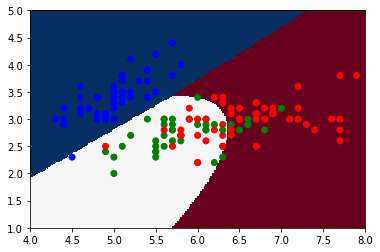

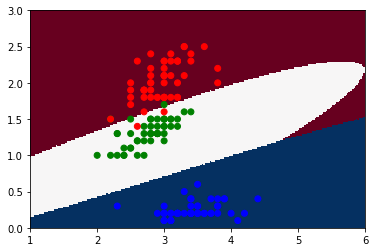

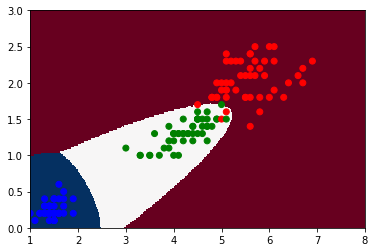

In [197]:
def argmax(x, y, c1, c2):
    pdf_1 = sps.multivariate_normal(mean=([means[0][c1], means[0][c2]]), 
                                    cov=([covs[0][c1][c1], covs[0][c1][c2]], 
                                         [covs[0][c2][c1], covs[0][c2][c2]])).pdf
    pdf_2 = sps.multivariate_normal(mean=([means[1][c1], means[1][c2]]), 
                                    cov=([covs[1][c1][c1], covs[1][c1][c2]], 
                                         [covs[1][c2][c1], covs[1][c2][c2]])).pdf
    
    pdf_3 = sps.multivariate_normal(mean=([means[2][c1], means[2][c2]]), 
                                    cov=([covs[2][c1][c1], covs[2][c1][c2]], 
                                         [covs[2][c2][c1], covs[2][c2][c2]])).pdf
    
    return np.argmax(np.array([pdf_1([x, y]), pdf_2([x, y]), pdf_3([x, y])]))

#компонента 1 - синий
#компонента 2 - зеленый
#компонента 3 - красный
c = ['b','g','r']
colors_points = [c[i] for i in classifications]

grid = np.mgrid[0:10:0.02, 0:10:0.02]


plt.figure()
colors = np.array([[argmax(y, x, 0, 1)
    for x in np.linspace(0, 10, 500)] 
          for y in np.linspace(0, 10, 500)])
#закрашиваем плоскость
plt.pcolormesh(grid[0], grid[1], colors, cmap='RdBu_r')
#наносим точки
plt.scatter(data['data'][:, 0], data['data'][:, 1], color=colors_points)
plt.xlim(4,8)
plt.ylim(1,5)
plt.show()


plt.figure()
colors = np.array([[argmax(y, x, 1, 3)
    for x in np.linspace(0, 10, 500)] 
          for y in np.linspace(0, 10, 500)])
plt.pcolormesh(grid[0], grid[1], colors, cmap='RdBu_r')
plt.scatter(data['data'][:, 1], data['data'][:, 3], color=colors_points)
plt.xlim(1,6)
plt.ylim(0,3)
plt.show()


plt.figure()
colors = np.array([[argmax(y, x, 2, 3)
    for x in np.linspace(0, 10, 500)] 
          for y in np.linspace(0, 10, 500)])
plt.pcolormesh(grid[0], grid[1], colors, cmap='RdBu_r')

plt.scatter(data['data'][:, 2], data['data'][:, 3], color=colors_points)
plt.xlim(1,8)
plt.ylim(0,3)
plt.show()